In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.metrics import normalized_mutual_info_score

In [2]:
price = pd.read_csv('price_demand_data.csv')
price.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY
0,VIC1,1/01/2021 0:30,4179.21,LOW
1,VIC1,1/01/2021 1:00,4047.76,LOW
2,VIC1,1/01/2021 1:30,3934.70,LOW
3,VIC1,1/01/2021 2:00,3766.45,LOW
4,VIC1,1/01/2021 2:30,3590.37,LOW


##### We need to summarize data as we don’t need to know the demands for different hours in a day. So we clean all the hours from SETTLEMENT column

In [3]:
price['SETTLEMENTDATE'] = price['SETTLEMENTDATE'].str.rstrip(':0123456789')
price['SETTLEMENTDATE'] = price['SETTLEMENTDATE'].str.rstrip(' ')

##### Let's check what we have in REGION column? 

In [4]:
price['REGION'].describe()

count     11664
unique        1
top        VIC1
freq      11664
Name: REGION, dtype: object

##### All the data is for VIC1 so we drop REGION column.

##### We put Date as index in both DataFrame so we can merge them together later, before doing that we rename SETTLEMENTDATE to Date.

In [5]:
price = price.drop(['REGION'] , axis = 1)
price = price.rename(columns={'SETTLEMENTDATE': 'Date'})
price.set_index('Date')
price.head()

,Date,TOTALDEMAND,PRICECATEGORY
0,1/01/2021,4179.21,LOW
1,1/01/2021,4047.76,LOW
2,1/01/2021,3934.70,LOW
3,1/01/2021,3766.45,LOW
4,1/01/2021,3590.37,LOW


##### To find maximum daily price category, we replace 'LOW' to 1 , 'MEDIUM' to 2, 'HIGH' to 3 and 'EXTREME' to 4 to find maximum price category, then we will replace to original

In [6]:
price=price.replace(to_replace="LOW",value=1)

In [7]:
price=price.replace(to_replace="MEDIUM",value=2)

In [8]:
price=price.replace(to_replace="HIGH",value=3)

In [9]:
price=price.replace(to_replace="EXTREME",value=4)

In [10]:
price.head()

,Date,TOTALDEMAND,PRICECATEGORY
0,1/01/2021,4179.21,1
1,1/01/2021,4047.76,1
2,1/01/2021,3934.70,1
3,1/01/2021,3766.45,1
4,1/01/2021,3590.37,1


##### Now we groupby by date and aggregate as 'TOTALDEMAND': 'max' , 'PRICECATEGORY': 'max', we think that for total demand we should consider maximum demand not adding all the demand during everyday. We change name of TOTALDEMAND to Max_Demand

In [11]:

price1=price.groupby('Date').agg({'TOTALDEMAND': 'max' , 'PRICECATEGORY': 'max'})
price1 = price1.rename(columns={'TOTALDEMAND': 'Max_Demand'})

price1.head()

,Max_Demand,PRICECATEGORY
Date,,
1/01/2021,5019.64,1
1/02/2021,5228.29,2
1/03/2021,5225.37,1
1/04/2021,5807.02,2
1/05/2021,5261.09,2


##### Now we change the values of 'PRICECATEGORY' to original ones:

In [12]:
price1=price1.replace(to_replace=1,value="LOW")

In [13]:
price1=price1.replace(to_replace=2,value="MEDIUM")

In [14]:
price1=price1.replace(to_replace=3,value="HIGH")

In [15]:
price1=price1.replace(to_replace=4,value="EXTREME")

In [16]:
price1.head()

,Max_Demand,PRICECATEGORY
Date,,
1/01/2021,5019.64,LOW
1/02/2021,5228.29,MEDIUM
1/03/2021,5225.37,LOW
1/04/2021,5807.02,MEDIUM
1/05/2021,5261.09,MEDIUM


##### Let's have a look at second DataFrame about weather:

In [17]:
weather = pd.read_csv('weather_data.csv')

In [18]:
weather.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/01/2021,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,19.2,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,2/01/2021,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,23.3,...,7,NNW,17,1013.3,28.7,38,7.0,SW,4,1008.5
2,3/01/2021,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,18.3,...,8,WSW,4,1007.7,23.5,59,4.0,SSW,2,1005.2
3,4/01/2021,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,16.2,...,8,SSE,11,1010.0,18.2,82,8.0,SSW,17,1011.0
4,5/01/2021,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,17.2,...,8,SSE,13,1012.5,18.2,82,8.0,SSE,19,1013.3


##### We calculate Average temperature and Range per day and add to DataFrame:

In [19]:
weather['Average temperature (°C)'] = (weather['Minimum temperature (°C)'] + weather['Maximum temperature (°C)']) / 2
weather['Temperature range (°C)'] = weather['Maximum temperature (°C)'] - weather['Minimum temperature (°C)']

##### It looks some columns dosen't effect on electricity demand, so let's keep some which might be help us.

In [20]:
weather1 = weather[['Date', 'Minimum temperature (°C)' , 'Maximum temperature (°C)', 'Average temperature (°C)' , 'Temperature range (°C)', 'Sunshine (hours)']]

##### We put Date as index in both DataFrame so we can merge them together later.

In [21]:
weather1 = weather1.set_index('Date')

In [22]:
weather1.head()

,Minimum temperature (°C),Maximum temperature (°C),Average temperature (°C),Temperature range (°C),Sunshine (hours)
Date,,,,,
1/01/2021,15.6,29.9,22.75,14.3,9.3
2/01/2021,18.4,29.0,23.70,10.6,1.3
3/01/2021,17.0,26.2,21.60,9.2,7.1
4/01/2021,16.0,18.6,17.30,2.6,0.0
5/01/2021,15.9,19.1,17.50,3.2,0.0


In [34]:
result = pd.merge(weather1,price1, left_index=True,right_index=True, how='inner')

In [35]:
result

,Minimum temperature (°C),Maximum temperature (°C),Average temperature (°C),Temperature range (°C),Sunshine (hours),Max_Demand,PRICECATEGORY
Date,,,,,,,
1/01/2021,15.6,29.9,22.75,14.3,9.3,5019.64,LOW
2/01/2021,18.4,29.0,23.70,10.6,1.3,4964.35,LOW
3/01/2021,17.0,26.2,21.60,9.2,7.1,4503.31,LOW
4/01/2021,16.0,18.6,17.30,2.6,0.0,4764.18,LOW
5/01/2021,15.9,19.1,17.50,3.2,0.0,4800.64,LOW
...,...,...,...,...,...,...,...
27/08/2021,4.6,13.6,9.10,9.0,3.8,6769.89,EXTREME
28/08/2021,5.3,17.8,11.55,12.5,9.6,5716.32,MEDIUM
29/08/2021,9.1,16.2,12.65,7.1,4.3,6227.89,EXTREME


##### we can't calculate  mutual information if there are some NaN in DataFrame, so let's drop all data with NaN value.

In [36]:
result=result.dropna(axis=0)

In [37]:
result

,Minimum temperature (°C),Maximum temperature (°C),Average temperature (°C),Temperature range (°C),Sunshine (hours),Max_Demand,PRICECATEGORY
Date,,,,,,,
1/01/2021,15.6,29.9,22.75,14.3,9.3,5019.64,LOW
2/01/2021,18.4,29.0,23.70,10.6,1.3,4964.35,LOW
3/01/2021,17.0,26.2,21.60,9.2,7.1,4503.31,LOW
4/01/2021,16.0,18.6,17.30,2.6,0.0,4764.18,LOW
5/01/2021,15.9,19.1,17.50,3.2,0.0,4800.64,LOW
...,...,...,...,...,...,...,...
27/08/2021,4.6,13.6,9.10,9.0,3.8,6769.89,EXTREME
28/08/2021,5.3,17.8,11.55,12.5,9.6,5716.32,MEDIUM
29/08/2021,9.1,16.2,12.65,7.1,4.3,6227.89,EXTREME


##### There is just one row which had NaN so it won't effect much in our model. 

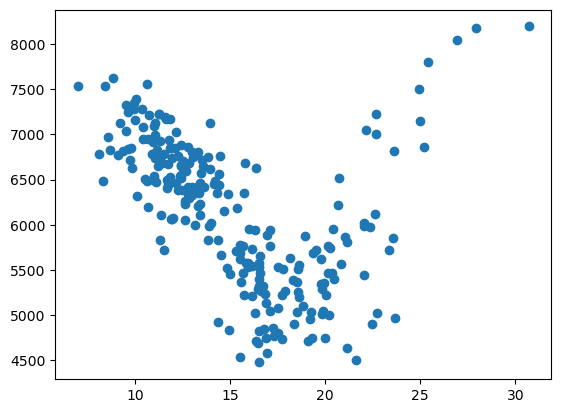

Pearson r is  -0.40602421364010743


In [38]:
plt.scatter(result['Average temperature (°C)'],result['Max_Demand'])
plt.show()

print("Pearson r is ",result['Average temperature (°C)'].corr(result['Max_Demand']))

In [39]:
result['Max_Demand_binned'] = pd.cut(result['Max_Demand'], bins = 4)

C:\Users\foadm\AppData\Local\Temp\ipykernel_6088\3155527172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Max_Demand_binned'] = pd.cut(result['Max_Demand'], bins = 4)


In [40]:
result['Average temperature (°C)_binned'] = pd.cut(result['Average temperature (°C)'], bins = 4)

C:\Users\foadm\AppData\Local\Temp\ipykernel_6088\303039089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Average temperature (°C)_binned'] = pd.cut(result['Average temperature (°C)'], bins = 4)


In [43]:
result.head()

,Minimum temperature (°C),Maximum temperature (°C),Average temperature (°C),Temperature range (°C),Sunshine (hours),Max_Demand,PRICECATEGORY,Max_Demand_binned,Average temperature (°C)_binned
Date,,,,,,,,,
1/01/2021,15.6,29.9,22.75,14.3,9.3,5019.64,LOW,"(4469.326, 5403.995]","(18.85, 24.775]"
2/01/2021,18.4,29.0,23.70,10.6,1.3,4964.35,LOW,"(4469.326, 5403.995]","(18.85, 24.775]"
3/01/2021,17.0,26.2,21.60,9.2,7.1,4503.31,LOW,"(4469.326, 5403.995]","(18.85, 24.775]"
4/01/2021,16.0,18.6,17.30,2.6,0.0,4764.18,LOW,"(4469.326, 5403.995]","(12.925, 18.85]"
5/01/2021,15.9,19.1,17.50,3.2,0.0,4800.64,LOW,"(4469.326, 5403.995]","(12.925, 18.85]"


In [44]:
normalized_mutual_info_score(result['Max_Demand_binned'], result['Average temperature (°C)_binned'], average_method='min')

0.27372631328849034

In [45]:
result1 = result.loc[result['Average temperature (°C)'] <= 18]
result1.head()

,Minimum temperature (°C),Maximum temperature (°C),Average temperature (°C),Temperature range (°C),Sunshine (hours),Max_Demand,PRICECATEGORY,Max_Demand_binned,Average temperature (°C)_binned
Date,,,,,,,,,
4/01/2021,16.0,18.6,17.30,2.6,0.0,4764.18,LOW,"(4469.326, 5403.995]","(12.925, 18.85]"
5/01/2021,15.9,19.1,17.50,3.2,0.0,4800.64,LOW,"(4469.326, 5403.995]","(12.925, 18.85]"
6/01/2021,13.7,19.2,16.45,5.5,3.2,4691.13,LOW,"(4469.326, 5403.995]","(12.925, 18.85]"
15/01/2021,13.2,20.6,16.90,7.4,7.9,4742.85,MEDIUM,"(4469.326, 5403.995]","(12.925, 18.85]"
16/01/2021,11.0,20.1,15.55,9.1,3.7,4529.66,LOW,"(4469.326, 5403.995]","(12.925, 18.85]"


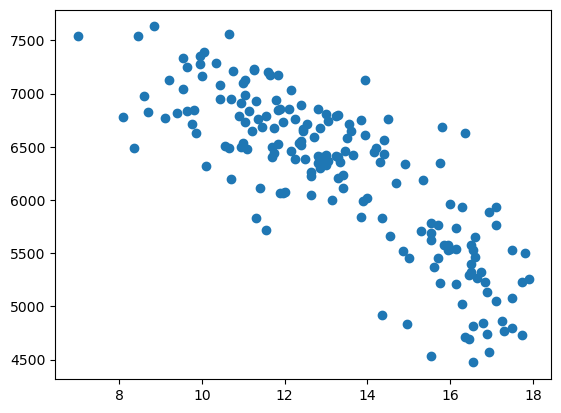

Pearson r is  -0.8237775833317617


In [46]:
plt.scatter(result1['Average temperature (°C)'],result1['Max_Demand'])
plt.show()

print("Pearson r is ",result1['Average temperature (°C)'].corr(result1['Max_Demand']))

In [47]:
result1['Max_Demand_binned'] = pd.cut(result1['Max_Demand'], bins = 4)

C:\Users\foadm\AppData\Local\Temp\ipykernel_6088\3798743104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result1['Max_Demand_binned'] = pd.cut(result1['Max_Demand'], bins = 4)


In [48]:
result1['Average temperature (°C)_binned'] = pd.cut(result1['Average temperature (°C)'], bins = 4)

C:\Users\foadm\AppData\Local\Temp\ipykernel_6088\1366586769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result1['Average temperature (°C)_binned'] = pd.cut(result1['Average temperature (°C)'], bins = 4)


In [50]:
result1.head()

,Minimum temperature (°C),Maximum temperature (°C),Average temperature (°C),Temperature range (°C),Sunshine (hours),Max_Demand,PRICECATEGORY,Max_Demand_binned,Average temperature (°C)_binned
Date,,,,,,,,,
4/01/2021,16.0,18.6,17.30,2.6,0.0,4764.18,LOW,"(4469.893, 5262.23]","(15.175, 17.9]"
5/01/2021,15.9,19.1,17.50,3.2,0.0,4800.64,LOW,"(4469.893, 5262.23]","(15.175, 17.9]"
6/01/2021,13.7,19.2,16.45,5.5,3.2,4691.13,LOW,"(4469.893, 5262.23]","(15.175, 17.9]"
15/01/2021,13.2,20.6,16.90,7.4,7.9,4742.85,MEDIUM,"(4469.893, 5262.23]","(15.175, 17.9]"
16/01/2021,11.0,20.1,15.55,9.1,3.7,4529.66,LOW,"(4469.893, 5262.23]","(15.175, 17.9]"


In [51]:
normalized_mutual_info_score(result1['Max_Demand_binned'], result1['Average temperature (°C)_binned'], average_method='min')

0.36203464286092446

In [52]:
result2 = result.loc[result['Average temperature (°C)'] >= 18]
result2.head()

,Minimum temperature (°C),Maximum temperature (°C),Average temperature (°C),Temperature range (°C),Sunshine (hours),Max_Demand,PRICECATEGORY,Max_Demand_binned,Average temperature (°C)_binned
Date,,,,,,,,,
1/01/2021,15.6,29.9,22.75,14.3,9.3,5019.64,LOW,"(4469.326, 5403.995]","(18.85, 24.775]"
2/01/2021,18.4,29.0,23.70,10.6,1.3,4964.35,LOW,"(4469.326, 5403.995]","(18.85, 24.775]"
3/01/2021,17.0,26.2,21.60,9.2,7.1,4503.31,LOW,"(4469.326, 5403.995]","(18.85, 24.775]"
7/01/2021,14.7,25.7,20.20,11.0,12.1,4994.78,LOW,"(4469.326, 5403.995]","(18.85, 24.775]"
8/01/2021,12.7,24.3,18.50,11.6,13.1,5365.19,MEDIUM,"(4469.326, 5403.995]","(12.925, 18.85]"


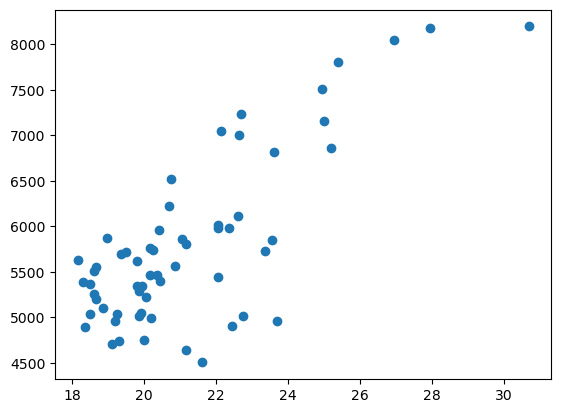

Pearson r is  0.7755552610053515


In [53]:
plt.scatter(result2['Average temperature (°C)'],result2['Max_Demand'])
plt.show()

print("Pearson r is ",result2['Average temperature (°C)'].corr(result2['Max_Demand']))

In [54]:
result2['Max_Demand_binned'] = pd.cut(result2['Max_Demand'], bins = 4)

C:\Users\foadm\AppData\Local\Temp\ipykernel_6088\1428866584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result2['Max_Demand_binned'] = pd.cut(result2['Max_Demand'], bins = 4)


In [55]:
result2['Average temperature (°C)_binned'] = pd.cut(result2['Average temperature (°C)'], bins = 4)

C:\Users\foadm\AppData\Local\Temp\ipykernel_6088\3696808874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result2['Average temperature (°C)_binned'] = pd.cut(result2['Average temperature (°C)'], bins = 4)


In [57]:
result2.head()

,Minimum temperature (°C),Maximum temperature (°C),Average temperature (°C),Temperature range (°C),Sunshine (hours),Max_Demand,PRICECATEGORY,Max_Demand_binned,Average temperature (°C)_binned
Date,,,,,,,,,
1/01/2021,15.6,29.9,22.75,14.3,9.3,5019.64,LOW,"(4499.616, 5426.69]","(21.288, 24.425]"
2/01/2021,18.4,29.0,23.70,10.6,1.3,4964.35,LOW,"(4499.616, 5426.69]","(21.288, 24.425]"
3/01/2021,17.0,26.2,21.60,9.2,7.1,4503.31,LOW,"(4499.616, 5426.69]","(21.288, 24.425]"
7/01/2021,14.7,25.7,20.20,11.0,12.1,4994.78,LOW,"(4499.616, 5426.69]","(18.137, 21.288]"
8/01/2021,12.7,24.3,18.50,11.6,13.1,5365.19,MEDIUM,"(4499.616, 5426.69]","(18.137, 21.288]"


In [58]:
normalized_mutual_info_score(result2['Max_Demand_binned'], result2['Average temperature (°C)_binned'], average_method='min')

0.3868698603282283

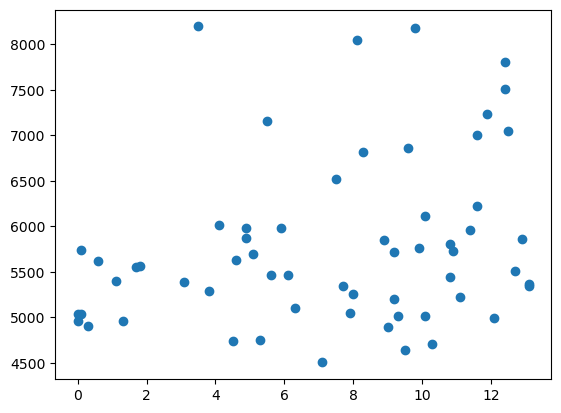

Pearson r is  0.26514061294955216


In [75]:
plt.scatter(result2['Sunshine (hours)'],result2['Max_Demand'])
plt.show()

print("Pearson r is ",result2['Sunshine (hours)'].corr(result2['Max_Demand']))

In [76]:
result2['Sunshine (hours)_binned'] = pd.cut(result2['Sunshine (hours)'], bins = 4)

In [77]:
normalized_mutual_info_score(result2['Max_Demand_binned'], result2['Sunshine (hours)_binned'], average_method='min')

0.0952851535490847

In [59]:
normalized_mutual_info_score(result['PRICECATEGORY'], result['Average temperature (°C)_binned'], average_method='min')

0.19943213236756233

In [60]:
normalized_mutual_info_score(result1['PRICECATEGORY'], result1['Average temperature (°C)_binned'], average_method='min')

0.2209204690895333

In [61]:
normalized_mutual_info_score(result2['PRICECATEGORY'], result2['Average temperature (°C)_binned'], average_method='min')

0.08945793106443801

In [62]:
result['Maximum temperature (°C)_binned'] = pd.cut(result['Maximum temperature (°C)'], bins = 4)

C:\Users\foadm\AppData\Local\Temp\ipykernel_6088\2483832009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Maximum temperature (°C)_binned'] = pd.cut(result['Maximum temperature (°C)'], bins = 4)


In [63]:
normalized_mutual_info_score(result['PRICECATEGORY'], result['Maximum temperature (°C)_binned'], average_method='min')

0.2514049922422264

In [64]:
result1['Maximum temperature (°C)_binned'] = pd.cut(result1['Maximum temperature (°C)'], bins = 4)

In [65]:
normalized_mutual_info_score(result1['PRICECATEGORY'], result1['Maximum temperature (°C)_binned'], average_method='min')

0.18814655172176065

In [66]:
result2['Maximum temperature (°C)_binned'] = pd.cut(result2['Maximum temperature (°C)'], bins = 4)

In [67]:
normalized_mutual_info_score(result2['PRICECATEGORY'], result2['Maximum temperature (°C)_binned'], average_method='min')

0.1107675919220544

In [68]:
result['Miniimum temperature (°C)_binned'] = pd.cut(result['Minimum temperature (°C)'], bins = 4)

C:\Users\foadm\AppData\Local\Temp\ipykernel_6088\1358021419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Miniimum temperature (°C)_binned'] = pd.cut(result['Minimum temperature (°C)'], bins = 4)


In [69]:
normalized_mutual_info_score(result['PRICECATEGORY'], result['Maximum temperature (°C)_binned'], average_method='min')

0.2514049922422264

In [70]:
result1['Minimum temperature (°C)_binned'] = pd.cut(result1['Minimum temperature (°C)'], bins = 4)

In [71]:
normalized_mutual_info_score(result1['PRICECATEGORY'], result1['Minimum temperature (°C)_binned'], average_method='min')

0.1753580873402963

In [72]:
result2['Miniimum temperature (°C)_binned'] = pd.cut(result2['Minimum temperature (°C)'], bins = 4)

In [73]:
normalized_mutual_info_score(result2['PRICECATEGORY'], result2['Maximum temperature (°C)_binned'], average_method='min')

0.1107675919220544

In [74]:
normalized_mutual_info_score(result['PRICECATEGORY'], result['Max_Demand_binned'], average_method='min')

0.275560450513684